In [21]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [22]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [23]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [24]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [25]:
tf.keras.backend.clear_session()

In [26]:
subject = 'Rio_Grande_do_Norte - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [27]:
data = pd.read_csv('2003_raw_Rio_Grande_do_Norte_input.csv')
pd.set_option('display.max_columns', None)
data = data.replace(-1.0, np.nan)
data

,data,Rio_Grande_do_Norte - PIB - Per Capita,Rio_Grande_do_Norte - PIB - Preços de Mercado,Rio_Grande_do_Norte - PIB - Estadual,Rio_Grande_do_Norte - PIB - Construção Civil,Rio_Grande_do_Norte - População,Rio_Grande_do_Norte - INCC (%),Rio_Grande_do_Norte - IPCA - Variação mensal durante o Plano Real (%),Rio_Grande_do_Norte - IGP-DI,Rio_Grande_do_Norte - Taxa Selic (%),Rio_Grande_do_Norte - IDH - Longevidade,Rio_Grande_do_Norte - IDH - Renda,Rio_Grande_do_Norte - IDH - Educação,Rio_Grande_do_Norte - NFSP - Fluxo Mensal (Milhões de reais),Rio_Grande_do_Norte - Estoque liquido de capital fixo - (R$),Rio_Grande_do_Norte - Desemprego,Rio_Grande_do_Norte - Produção de Cimento (t),Rio_Grande_do_Norte - Valor,Rio_Grande_do_Norte - Consumo de Cimento (t)
0,2003-01-01,1.912845e+06,1.006895e+06,0.670519,1.916359e+06,2852784.0,1.70,12.53,2.70,0.082293,0.70,0.608,0.396,3.46,6.098524e+06,7.255709,NaN,NaN,36825.0
1,2003-02-01,1.912845e+06,1.006895e+06,0.670519,1.916359e+06,2852784.0,1.51,2.25,2.17,0.088771,0.70,0.608,0.396,3.59,6.172460e+06,7.255709,27774.0,NaN,34088.0
2,2003-03-01,1.912845e+06,1.006895e+06,0.670519,1.916359e+06,2852784.0,1.39,3.86,1.59,0.090733,0.70,0.608,0.396,3.84,6.172460e+06,7.255709,50384.0,NaN,30150.0
3,2003-04-01,1.912845e+06,1.006895e+06,0.670519,1.916359e+06,2852784.0,1.38,5.13,1.66,0.092749,0.70,0.608,0.396,3.95,6.172460e+06,7.255709,123096.0,NaN,31224.0
4,2003-05-01,1.912845e+06,1.006895e+06,0.670519,1.916359e+06,2852784.0,0.90,6.15,0.41,0.092758,0.70,0.608,0.396,4.06,6.172460e+06,7.255709,46127.0,NaN,33606.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08-01,2.942285e+06,4.964643e+06,0.845725,1.584313e+06,3479010.0,0.58,2.42,-0.01,0.024620,0.85,0.680,0.680,0.69,7.827728e+06,12.300000,51720.0,NaN,54306.0
200,2019-09-01,2.942285e+06,4.964643e+06,0.845725,1.584313e+06,3479010.0,0.42,2.54,-0.51,0.022751,0.85,0.680,0.680,0.62,7.827728e+06,12.000000,NaN,NaN,52511.0
201,2019-10-01,2.942285e+06,4.964643e+06,0.845725,1.584313e+06,3479010.0,0.46,2.49,0.50,0.022035,0.85,0.680,0.680,0.59,7.827728e+06,11.900000,71296.0,NaN,59472.0
202,2019-11-01,2.942285e+06,4.964643e+06,0.845725,1.584313e+06,3479010.0,0.18,2.60,0.55,0.020790,0.85,0.680,0.680,0.57,7.827728e+06,11.700000,14520.0,NaN,54022.0


In [28]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data = target_data/1000
target_data

0      38.146
1      30.350
2      33.791
3      30.891
4      30.724
        ...  
199       NaN
200       NaN
201       NaN
202       NaN
203       NaN
Name: Rio_Grande_do_Norte - Consumo de Cimento (t), Length: 204, dtype: float64

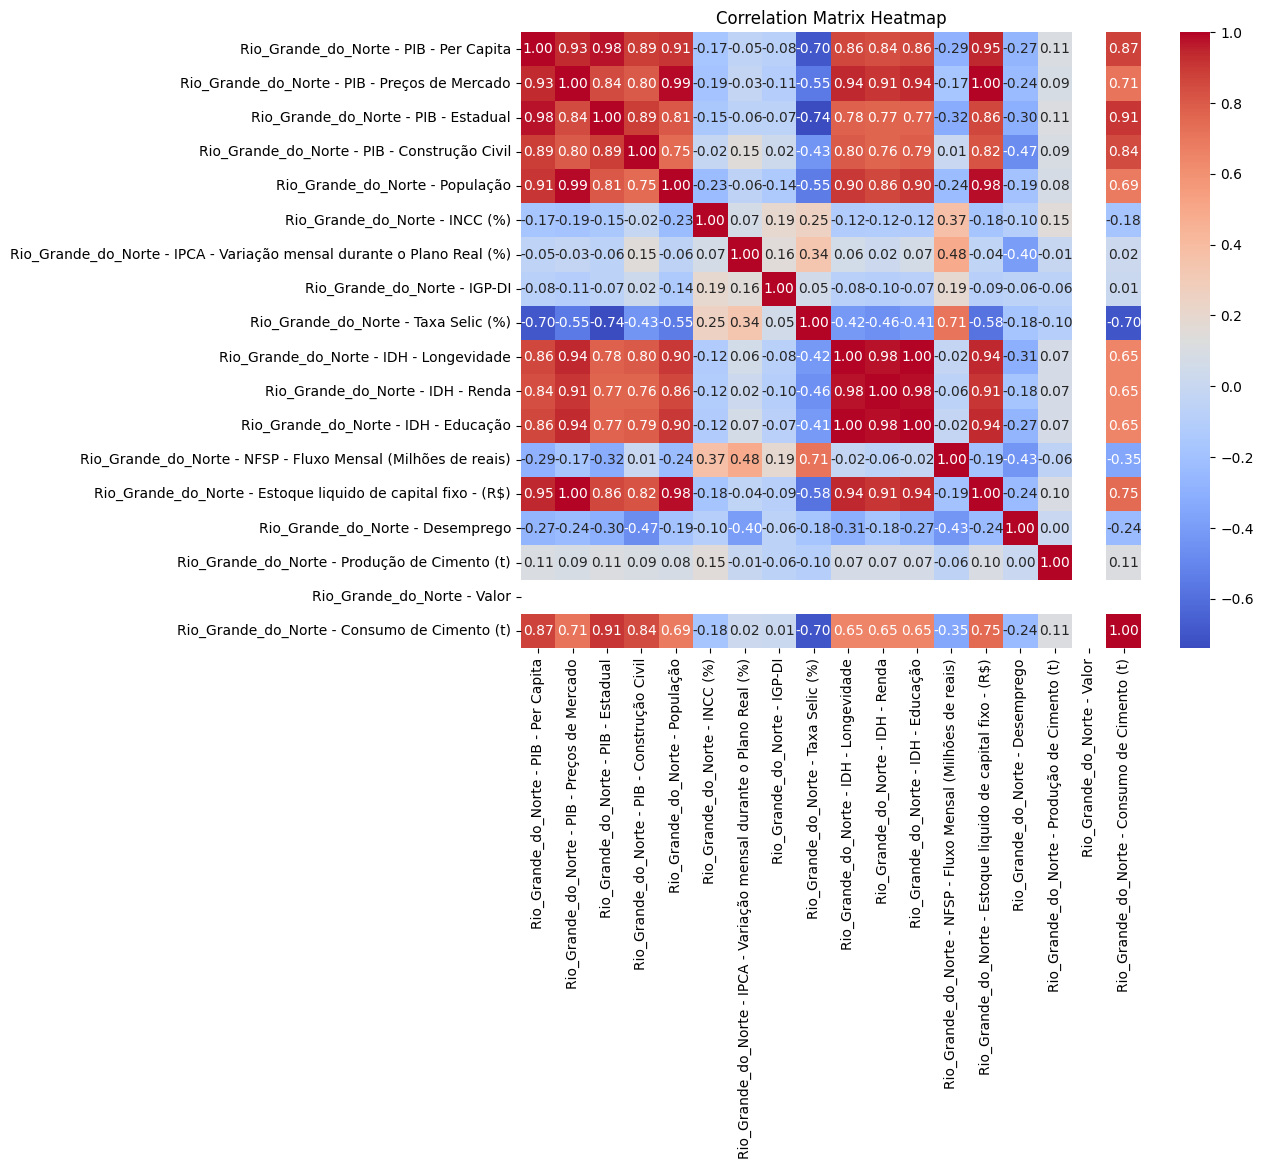

In [29]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [30]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
# scaler=MinMaxScaler()
# scaled_data = scaler.fit_transform(input_data)
# input_data = pd.DataFrame(scaled_data, columns=input_data.columns)
input_data = input_data.fillna(0.0)
input_data

,Rio_Grande_do_Norte - PIB - Per Capita,Rio_Grande_do_Norte - PIB - Preços de Mercado,Rio_Grande_do_Norte - PIB - Estadual,Rio_Grande_do_Norte - PIB - Construção Civil,Rio_Grande_do_Norte - População,Rio_Grande_do_Norte - INCC (%),Rio_Grande_do_Norte - IPCA - Variação mensal durante o Plano Real (%),Rio_Grande_do_Norte - IGP-DI,Rio_Grande_do_Norte - Taxa Selic (%),Rio_Grande_do_Norte - IDH - Longevidade,Rio_Grande_do_Norte - IDH - Renda,Rio_Grande_do_Norte - IDH - Educação,Rio_Grande_do_Norte - NFSP - Fluxo Mensal (Milhões de reais),Rio_Grande_do_Norte - Estoque liquido de capital fixo - (R$),Rio_Grande_do_Norte - Desemprego,Rio_Grande_do_Norte - Produção de Cimento (t),Rio_Grande_do_Norte - Valor
0,-1.517206,-1.362656,-1.398254,-0.289775,-1.552940,1.998868,4.052332,3.466715,2.303195,-0.909951,-0.925848,-0.918707,3.108599,-1.539424,-1.305036,0.000000,0.0
1,-1.517206,-1.362656,-1.398254,-0.289775,-1.552940,1.647487,-0.596188,2.630940,2.745235,-0.909951,-0.925848,-0.918707,3.275709,-1.411460,-1.305036,-0.540764,0.0
2,-1.517206,-1.362656,-1.398254,-0.289775,-1.552940,1.425561,0.131839,1.716318,2.879123,-0.909951,-0.925848,-0.918707,3.597074,-1.411460,-1.305036,-0.457776,0.0
3,-1.517206,-1.362656,-1.398254,-0.289775,-1.552940,1.407068,0.706121,1.826703,3.016721,-0.909951,-0.925848,-0.918707,3.738475,-1.411460,-1.305036,-0.190892,0.0
4,-1.517206,-1.362656,-1.398254,-0.289775,-1.552940,0.519367,1.167355,-0.144465,3.017322,-0.909951,-0.925848,-0.918707,3.879875,-1.411460,-1.305036,-0.473400,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.738546,1.609501,0.219887,-0.002918,1.660595,-0.590259,-0.966985,-1.264088,-0.729479,1.432600,1.569602,1.367329,-0.374997,1.441346,1.354192,-0.273131,0.0
176,0.738546,1.609501,0.219887,-0.002918,1.660595,-0.479297,-0.881068,-0.412544,-0.941281,1.432600,1.569602,1.367329,-0.439270,1.441346,1.354192,-0.558929,0.0
177,0.738546,1.609501,0.219887,-0.002918,1.660595,-1.034110,-0.808718,0.186692,-1.140710,1.432600,1.569602,1.367329,-0.503543,1.441346,1.354192,-0.331752,0.0
178,0.738546,1.609501,0.219887,-0.002918,1.660595,-0.571766,-0.614276,-0.633314,-1.226481,1.432600,1.569602,1.367329,-0.503543,1.441346,1.411450,-0.569889,0.0


In [31]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Rio_Grande_do_Norte - PIB - Per Capita,Rio_Grande_do_Norte - PIB - Preços de Mercado,Rio_Grande_do_Norte - PIB - Estadual,Rio_Grande_do_Norte - PIB - Construção Civil,Rio_Grande_do_Norte - População,Rio_Grande_do_Norte - INCC (%),Rio_Grande_do_Norte - IPCA - Variação mensal durante o Plano Real (%),Rio_Grande_do_Norte - IGP-DI,Rio_Grande_do_Norte - Taxa Selic (%),Rio_Grande_do_Norte - IDH - Longevidade,Rio_Grande_do_Norte - IDH - Renda,Rio_Grande_do_Norte - IDH - Educação,Rio_Grande_do_Norte - NFSP - Fluxo Mensal (Milhões de reais),Rio_Grande_do_Norte - Estoque liquido de capital fixo - (R$),Rio_Grande_do_Norte - Desemprego,Rio_Grande_do_Norte - Produção de Cimento (t),Rio_Grande_do_Norte - Valor
0,-1.517206,-1.362656,-1.398254,-0.289775,-1.552940,1.998868,4.052332,3.466715,2.303195,-0.909951,-0.925848,-0.918707,3.108599,-1.539424,-1.305036,0.000000,0.0
1,-1.517206,-1.362656,-1.398254,-0.289775,-1.552940,1.647487,-0.596188,2.630940,2.745235,-0.909951,-0.925848,-0.918707,3.275709,-1.411460,-1.305036,-0.540764,0.0
2,-1.517206,-1.362656,-1.398254,-0.289775,-1.552940,1.425561,0.131839,1.716318,2.879123,-0.909951,-0.925848,-0.918707,3.597074,-1.411460,-1.305036,-0.457776,0.0
3,-1.517206,-1.362656,-1.398254,-0.289775,-1.552940,1.407068,0.706121,1.826703,3.016721,-0.909951,-0.925848,-0.918707,3.738475,-1.411460,-1.305036,-0.190892,0.0
4,-1.517206,-1.362656,-1.398254,-0.289775,-1.552940,0.519367,1.167355,-0.144465,3.017322,-0.909951,-0.925848,-0.918707,3.879875,-1.411460,-1.305036,-0.473400,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.031147,1.468378,0.706914,0.939022,1.491075,-0.238878,0.629248,-1.406012,0.272188,1.276430,0.972864,1.367329,0.794771,1.416222,-0.363548,0.000000,0.0
164,1.031147,1.468378,0.706914,0.939022,1.491075,-0.608753,0.837256,-0.112926,0.272188,1.276430,0.972864,1.367329,0.730498,1.416222,-0.306290,0.000000,0.0
165,1.031147,1.468378,0.706914,0.939022,1.491075,-0.534778,0.877953,-0.743700,0.272188,1.276430,0.972864,1.367329,0.743353,1.416222,-0.249032,0.000000,0.0
166,1.031147,1.468378,0.706914,0.939022,1.491075,-0.756703,1.000045,-0.586006,0.248413,1.276430,0.972864,1.367329,0.614807,1.416222,-0.249032,0.000000,0.0


In [32]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0      38.146
1      30.350
2      33.791
3      30.891
4      30.724
        ...  
163    48.520
164    41.365
165    43.813
166    43.816
167    38.245
Name: Rio_Grande_do_Norte - Consumo de Cimento (t), Length: 168, dtype: float64

In [33]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [34]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [35]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Rio_Grande_do_Norte - PIB - Per Capita,Rio_Grande_do_Norte - PIB - Preços de Mercado,Rio_Grande_do_Norte - PIB - Estadual,Rio_Grande_do_Norte - PIB - Construção Civil,Rio_Grande_do_Norte - População,Rio_Grande_do_Norte - INCC (%),Rio_Grande_do_Norte - IPCA - Variação mensal durante o Plano Real (%),Rio_Grande_do_Norte - IGP-DI,Rio_Grande_do_Norte - Taxa Selic (%),Rio_Grande_do_Norte - IDH - Longevidade,Rio_Grande_do_Norte - IDH - Renda,Rio_Grande_do_Norte - IDH - Educação,Rio_Grande_do_Norte - NFSP - Fluxo Mensal (Milhões de reais),Rio_Grande_do_Norte - Estoque liquido de capital fixo - (R$),Rio_Grande_do_Norte - Desemprego,Rio_Grande_do_Norte - Produção de Cimento (t),Rio_Grande_do_Norte - Valor
132,1.328604,1.086084,1.319920,1.757414,1.138761,-0.960135,1.058830,0.297077,-0.755853,1.12026,0.972864,1.045352,-0.285015,0.834026,-1.279676,-0.468372,0.0
133,1.328604,1.086084,1.319920,1.757414,1.138761,0.482379,-1.364912,-0.160234,-0.688658,1.12026,0.972864,1.045352,-0.349288,1.129318,-0.993386,0.000000,0.0
134,1.328604,1.086084,1.319920,1.757414,1.138761,-0.534778,-1.052901,0.549386,-0.626634,1.12026,0.972864,1.045352,-0.374997,1.129318,-0.821612,0.000000,0.0
135,1.328604,1.086084,1.319920,1.757414,1.138761,-0.627247,-0.627842,1.542855,-0.571481,1.12026,0.972864,1.045352,-0.259306,1.129318,-0.936128,0.615400,0.0
136,1.328604,1.086084,1.319920,1.757414,1.138761,0.482379,-0.320352,-0.081387,-0.516512,1.12026,0.972864,1.045352,-0.053632,1.129318,-1.050644,0.000000,0.0
137,1.328604,1.086084,1.319920,1.757414,1.138761,2.646150,-0.107822,-1.500628,-0.510405,1.12026,0.972864,1.045352,0.023495,1.129318,-1.165160,0.000000,0.0
138,1.328604,1.086084,1.319920,1.757414,1.138761,0.075516,0.082098,-1.784477,-0.510405,1.12026,0.972864,1.045352,-0.002214,1.129318,-1.222418,0.000000,0.0
139,1.328604,1.086084,1.319920,1.757414,1.138761,0.241960,0.086620,-1.658322,-0.510405,1.12026,0.972864,1.045352,-0.143614,1.129318,-1.336934,-0.226209,0.0
140,1.328604,1.086084,1.319920,1.757414,1.138761,-0.997122,0.204189,-0.696392,-0.510054,1.12026,0.972864,1.045352,-0.182178,1.129318,-1.451450,0.000000,0.0
141,1.328604,1.086084,1.319920,1.757414,1.138761,-0.867666,0.470982,-0.759469,-0.510405,1.12026,0.972864,1.045352,-0.105051,1.129318,-1.565966,0.000000,0.0


In [36]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [37]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [38]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(72, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.LSTM(36, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.1,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [39]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [40]:
winner_seed = get_a_good_seed(reshaped_train, reshaped_target, reshaped_test, reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[3020710447, 516747180, 2933714577, 1670356790, 2077658546, 88451854, 1087066339, 2009390109, 4265946828, 2024294043]


Step: 0 ___________________________________________
val_loss: 114.86141204833984
winner_seed: 3020710447


Step: 1 ___________________________________________
val_loss: 80.85234832763672
winner_seed: 516747180


Step: 2 ___________________________________________
val_loss: 83.55213165283203


Step: 3 ___________________________________________
val_loss: 49.092411041259766
winner_seed: 1670356790


Step: 4 ___________________________________________
val_loss: 85.84942626953125


Step: 5 ___________________________________________
val_loss: 95.57598876953125


Step: 6 ___________________________________________
val_loss: 85.85236358642578


Step: 7 ___________________________________________
val_loss: 57.18569564819336


Step: 8 ___________________________________________
val_loss: 84.27027893066406


Step: 9 ___________________________________________
val_loss: 142.178

In [41]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)
# 2652417522

Epoch 1/10000
4/4 [==============================] - 2s 120ms/step - loss: 4541.8535 - val_loss: 1696.8215
Epoch 2/10000
4/4 [==============================] - 0s 11ms/step - loss: 2091.5908 - val_loss: 324.7962
Epoch 3/10000
4/4 [==============================] - 0s 12ms/step - loss: 213.5180 - val_loss: 749.2056
Epoch 4/10000
4/4 [==============================] - 0s 10ms/step - loss: 153.3082 - val_loss: 824.9918
Epoch 5/10000
4/4 [==============================] - 0s 11ms/step - loss: 146.8471 - val_loss: 792.8538
Epoch 6/10000
4/4 [==============================] - 0s 11ms/step - loss: 146.0726 - val_loss: 821.6605
Epoch 7/10000
4/4 [==============================] - 0s 11ms/step - loss: 145.2536 - val_loss: 836.1429
Epoch 8/10000
4/4 [==============================] - 0s 10ms/step - loss: 139.9703 - val_loss: 849.6600
Epoch 9/10000
4/4 [==============================] - 0s 9ms/step - loss: 133.4547 - val_loss: 824.1248
Epoch 10/10000
4/4 [==============================] - 0s 10ms

Epoch 80/10000
4/4 [==============================] - 0s 9ms/step - loss: 28.9214 - val_loss: 213.2907
Epoch 81/10000
4/4 [==============================] - 0s 9ms/step - loss: 26.1258 - val_loss: 205.8604
Epoch 82/10000
4/4 [==============================] - 0s 10ms/step - loss: 31.9378 - val_loss: 228.0233
Epoch 83/10000
4/4 [==============================] - 0s 9ms/step - loss: 22.9466 - val_loss: 211.3767
Epoch 84/10000
4/4 [==============================] - 0s 8ms/step - loss: 25.2349 - val_loss: 218.4152
Epoch 85/10000
4/4 [==============================] - 0s 9ms/step - loss: 25.2404 - val_loss: 228.8074
Epoch 86/10000
4/4 [==============================] - 0s 9ms/step - loss: 32.5628 - val_loss: 212.5692
Epoch 87/10000
4/4 [==============================] - 0s 9ms/step - loss: 26.5696 - val_loss: 197.7456
Epoch 88/10000
4/4 [==============================] - 0s 9ms/step - loss: 24.7674 - val_loss: 222.1888
Epoch 89/10000
4/4 [==============================] - 0s 9ms/step - loss

4/4 [==============================] - 0s 10ms/step - loss: 18.0286 - val_loss: 212.2552
Epoch 159/10000
4/4 [==============================] - 0s 11ms/step - loss: 22.3314 - val_loss: 206.0149
Epoch 160/10000
4/4 [==============================] - 0s 10ms/step - loss: 19.7137 - val_loss: 205.6404
Epoch 161/10000
4/4 [==============================] - 0s 9ms/step - loss: 21.5429 - val_loss: 206.0605
Epoch 162/10000
4/4 [==============================] - 0s 9ms/step - loss: 20.7061 - val_loss: 193.4281
Epoch 163/10000
4/4 [==============================] - 0s 8ms/step - loss: 21.7745 - val_loss: 193.8743
Epoch 164/10000
4/4 [==============================] - 0s 9ms/step - loss: 21.0249 - val_loss: 210.3070
Epoch 165/10000
4/4 [==============================] - 0s 9ms/step - loss: 19.6989 - val_loss: 217.0965
Epoch 166/10000
4/4 [==============================] - 0s 9ms/step - loss: 23.6901 - val_loss: 209.8287
Epoch 167/10000
4/4 [==============================] - 0s 8ms/step - loss: 19

4/4 [==============================] - 0s 9ms/step - loss: 17.7758 - val_loss: 186.2243
Epoch 237/10000
4/4 [==============================] - 0s 9ms/step - loss: 18.4893 - val_loss: 182.5943
Epoch 238/10000
4/4 [==============================] - 0s 8ms/step - loss: 16.8737 - val_loss: 186.0639
Epoch 239/10000
4/4 [==============================] - 0s 8ms/step - loss: 18.8646 - val_loss: 187.3742
Epoch 240/10000
4/4 [==============================] - 0s 9ms/step - loss: 17.3273 - val_loss: 213.7362
Epoch 241/10000
4/4 [==============================] - 0s 10ms/step - loss: 23.1695 - val_loss: 212.0672
Epoch 242/10000
4/4 [==============================] - 0s 10ms/step - loss: 17.5180 - val_loss: 182.0752
Epoch 243/10000
4/4 [==============================] - 0s 9ms/step - loss: 17.3524 - val_loss: 193.0201
Epoch 244/10000
4/4 [==============================] - 0s 10ms/step - loss: 18.2356 - val_loss: 176.3265
Epoch 245/10000
4/4 [==============================] - 0s 9ms/step - loss: 19

4/4 [==============================] - 0s 10ms/step - loss: 16.0279 - val_loss: 181.1797
Epoch 315/10000
4/4 [==============================] - 0s 10ms/step - loss: 15.0128 - val_loss: 206.0397
Epoch 316/10000
4/4 [==============================] - 0s 9ms/step - loss: 14.7403 - val_loss: 185.9328
Epoch 317/10000
4/4 [==============================] - 0s 10ms/step - loss: 14.1812 - val_loss: 172.7257
Epoch 318/10000
4/4 [==============================] - 0s 9ms/step - loss: 15.7369 - val_loss: 175.4423
Epoch 319/10000
4/4 [==============================] - 0s 9ms/step - loss: 14.7019 - val_loss: 189.0385
Epoch 320/10000
4/4 [==============================] - 0s 9ms/step - loss: 15.7523 - val_loss: 191.3287
Epoch 321/10000
4/4 [==============================] - 0s 9ms/step - loss: 15.4509 - val_loss: 195.1478
Epoch 322/10000
4/4 [==============================] - 0s 10ms/step - loss: 17.0276 - val_loss: 170.2250
Epoch 323/10000
4/4 [==============================] - 0s 10ms/step - loss: 

4/4 [==============================] - 0s 12ms/step - loss: 15.2115 - val_loss: 175.8938
Epoch 393/10000
4/4 [==============================] - 0s 10ms/step - loss: 14.4476 - val_loss: 170.2370
Epoch 394/10000
4/4 [==============================] - 0s 9ms/step - loss: 14.6882 - val_loss: 162.6962
Epoch 395/10000
4/4 [==============================] - 0s 9ms/step - loss: 14.3513 - val_loss: 172.4918
Epoch 396/10000
4/4 [==============================] - 0s 11ms/step - loss: 14.4866 - val_loss: 163.0118
Epoch 397/10000
4/4 [==============================] - 0s 9ms/step - loss: 14.3356 - val_loss: 188.3910
Epoch 398/10000
4/4 [==============================] - 0s 9ms/step - loss: 15.5823 - val_loss: 173.7820
Epoch 399/10000
4/4 [==============================] - 0s 9ms/step - loss: 14.6374 - val_loss: 179.4908
Epoch 400/10000
4/4 [==============================] - 0s 10ms/step - loss: 16.7321 - val_loss: 173.7029
Epoch 401/10000
4/4 [==============================] - 0s 9ms/step - loss: 1

4/4 [==============================] - 0s 8ms/step - loss: 12.0304 - val_loss: 165.7526
Epoch 471/10000
4/4 [==============================] - 0s 9ms/step - loss: 12.2920 - val_loss: 164.3041
Epoch 472/10000
4/4 [==============================] - 0s 9ms/step - loss: 12.6529 - val_loss: 162.8783
Epoch 473/10000
4/4 [==============================] - 0s 9ms/step - loss: 12.3688 - val_loss: 173.1257
Epoch 474/10000
4/4 [==============================] - 0s 9ms/step - loss: 11.3853 - val_loss: 157.5816
Epoch 475/10000
4/4 [==============================] - 0s 9ms/step - loss: 13.7334 - val_loss: 165.4424
Epoch 476/10000
4/4 [==============================] - 0s 9ms/step - loss: 13.1441 - val_loss: 184.9267
Epoch 477/10000
4/4 [==============================] - 0s 8ms/step - loss: 11.7794 - val_loss: 179.5905
Epoch 478/10000
4/4 [==============================] - 0s 9ms/step - loss: 15.5659 - val_loss: 174.7579
Epoch 479/10000
4/4 [==============================] - 0s 10ms/step - loss: 13.3

4/4 [==============================] - 0s 9ms/step - loss: 12.0006 - val_loss: 155.3765
Epoch 549/10000
4/4 [==============================] - 0s 10ms/step - loss: 10.7021 - val_loss: 149.2714
Epoch 550/10000
4/4 [==============================] - 0s 11ms/step - loss: 11.3348 - val_loss: 141.4084
Epoch 551/10000
4/4 [==============================] - 0s 10ms/step - loss: 10.4566 - val_loss: 157.5242
Epoch 552/10000
4/4 [==============================] - 0s 9ms/step - loss: 12.1737 - val_loss: 150.0569
Epoch 553/10000
4/4 [==============================] - 0s 10ms/step - loss: 10.9612 - val_loss: 142.3715
Epoch 554/10000
4/4 [==============================] - 0s 11ms/step - loss: 10.7650 - val_loss: 141.8361
Epoch 555/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.6675 - val_loss: 131.4361
Epoch 556/10000
4/4 [==============================] - 0s 10ms/step - loss: 10.3333 - val_loss: 135.4684
Epoch 557/10000
4/4 [==============================] - 0s 10ms/step - loss

Epoch 627/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.1943 - val_loss: 129.5554
Epoch 628/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.5588 - val_loss: 122.5310
Epoch 629/10000
4/4 [==============================] - 0s 10ms/step - loss: 11.1672 - val_loss: 122.2162
Epoch 630/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.2671 - val_loss: 125.8968
Epoch 631/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.2325 - val_loss: 128.7455
Epoch 632/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.1146 - val_loss: 134.3419
Epoch 633/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.4119 - val_loss: 134.8545
Epoch 634/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.8004 - val_loss: 119.4914
Epoch 635/10000
4/4 [==============================] - 0s 9ms/step - loss: 11.0805 - val_loss: 124.0226
Epoch 636/10000
4/4 [==============================] - 0s 11ms/step 

Epoch 706/10000
4/4 [==============================] - 0s 10ms/step - loss: 9.0631 - val_loss: 120.6260
Epoch 707/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.6906 - val_loss: 132.2006
Epoch 708/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.3190 - val_loss: 123.6154
Epoch 709/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.8115 - val_loss: 124.7294
Epoch 710/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.2579 - val_loss: 125.1840
Epoch 711/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.7166 - val_loss: 120.5608
Epoch 712/10000
4/4 [==============================] - 0s 10ms/step - loss: 9.9248 - val_loss: 111.1574
Epoch 713/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.6378 - val_loss: 123.8322
Epoch 714/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.5140 - val_loss: 117.7415
Epoch 715/10000
4/4 [==============================] - 0s 9ms/ste

4/4 [==============================] - 0s 10ms/step - loss: 8.1348 - val_loss: 124.7203
Epoch 786/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.2205 - val_loss: 123.1193
Epoch 787/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.9672 - val_loss: 115.9431
Epoch 788/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.7165 - val_loss: 125.3623
Epoch 789/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.0397 - val_loss: 115.3206
Epoch 790/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.2803 - val_loss: 117.2068
Epoch 791/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.6813 - val_loss: 128.0790
Epoch 792/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.2925 - val_loss: 124.4309
Epoch 793/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.8849 - val_loss: 115.6664
Epoch 794/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.1783 

4/4 [==============================] - 0s 10ms/step - loss: 6.7559 - val_loss: 120.7465
Epoch 865/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.4454 - val_loss: 115.1051
Epoch 866/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.4194 - val_loss: 113.4425
Epoch 867/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.0350 - val_loss: 121.6735
Epoch 868/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.0853 - val_loss: 117.1173
Epoch 869/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.9789 - val_loss: 118.8215
Epoch 870/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.9697 - val_loss: 126.4042
Epoch 871/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.7064 - val_loss: 131.2876
Epoch 872/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.8220 - val_loss: 115.7458
Epoch 873/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.63

Epoch 943/10000
4/4 [==============================] - 0s 11ms/step - loss: 10.2823 - val_loss: 157.3701
Epoch 944/10000
4/4 [==============================] - 0s 10ms/step - loss: 10.8832 - val_loss: 167.4966
Epoch 945/10000
4/4 [==============================] - 0s 10ms/step - loss: 11.1890 - val_loss: 162.3964
Epoch 946/10000
4/4 [==============================] - 0s 11ms/step - loss: 10.9892 - val_loss: 147.9600
Epoch 947/10000
4/4 [==============================] - 0s 10ms/step - loss: 10.9637 - val_loss: 153.1015
Epoch 948/10000
4/4 [==============================] - 0s 11ms/step - loss: 10.8470 - val_loss: 126.4338
Epoch 949/10000
4/4 [==============================] - 0s 10ms/step - loss: 10.1054 - val_loss: 119.1351
Epoch 950/10000
4/4 [==============================] - 0s 11ms/step - loss: 10.2874 - val_loss: 113.0858
Epoch 951/10000
4/4 [==============================] - 0s 10ms/step - loss: 11.3769 - val_loss: 124.4055
Epoch 952/10000
4/4 [==============================] - 

4/4 [==============================] - 0s 10ms/step - loss: 7.7681 - val_loss: 100.6957
Epoch 1022/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.5908 - val_loss: 104.1780
Epoch 1023/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.5699 - val_loss: 104.5841
Epoch 1024/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.5263 - val_loss: 70.9586
Epoch 1025/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.1641 - val_loss: 81.8389
Epoch 1026/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.7006 - val_loss: 85.3453
Epoch 1027/10000
4/4 [==============================] - 0s 10ms/step - loss: 9.5354 - val_loss: 93.9756
Epoch 1028/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.4581 - val_loss: 79.3636
Epoch 1029/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.9885 - val_loss: 66.3792
Epoch 1030/10000
4/4 [==============================] - 0s 11ms/step - loss: 7

4/4 [==============================] - 0s 9ms/step - loss: 7.1703 - val_loss: 82.1869
Epoch 1101/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.0027 - val_loss: 66.2396
Epoch 1102/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.5346 - val_loss: 67.5851
Epoch 1103/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.2585 - val_loss: 72.9278
Epoch 1104/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.8130 - val_loss: 66.8624
Epoch 1105/10000
4/4 [==============================] - 0s 8ms/step - loss: 6.1844 - val_loss: 67.2820
Epoch 1106/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.6706 - val_loss: 60.5236
Epoch 1107/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.4894 - val_loss: 64.1802
Epoch 1108/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.0126 - val_loss: 56.5760
Epoch 1109/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.3426 - val_

4/4 [==============================] - 0s 10ms/step - loss: 6.4820 - val_loss: 77.8903
Epoch 1180/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.1232 - val_loss: 81.5022
Epoch 1181/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.1586 - val_loss: 70.0395
Epoch 1182/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.9643 - val_loss: 69.2399
Epoch 1183/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.1438 - val_loss: 78.6820
Epoch 1184/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.1574 - val_loss: 81.7719
Epoch 1185/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.1270 - val_loss: 78.2780
Epoch 1186/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.9101 - val_loss: 72.7856
Epoch 1187/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.6720 - val_loss: 75.5856
Epoch 1188/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.0706

4/4 [==============================] - 0s 9ms/step - loss: 6.0970 - val_loss: 68.8654
Epoch 1259/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.7468 - val_loss: 68.2146
Epoch 1260/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.0985 - val_loss: 69.9763
Epoch 1261/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.6582 - val_loss: 77.5536
Epoch 1262/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.1799 - val_loss: 69.8341
Epoch 1263/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.6567 - val_loss: 67.3912
Epoch 1264/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.9748 - val_loss: 74.6880
Epoch 1265/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.1659 - val_loss: 70.7063
Epoch 1266/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.6677 - val_loss: 65.2876
Epoch 1267/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.1057 - v

4/4 [==============================] - 0s 11ms/step - loss: 5.1989 - val_loss: 64.7639
Epoch 1338/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.0474 - val_loss: 59.8653
Epoch 1339/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.8050 - val_loss: 55.4550
Epoch 1340/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.6758 - val_loss: 64.9431
Epoch 1341/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.6706 - val_loss: 60.7133
Epoch 1342/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.9924 - val_loss: 71.4360
Epoch 1343/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.8998 - val_loss: 64.5283
Epoch 1344/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.1642 - val_loss: 55.2680
Epoch 1345/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.3682 - val_loss: 55.7011
Epoch 1346/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.9015

4/4 [==============================] - 0s 9ms/step - loss: 5.5106 - val_loss: 62.6177
Epoch 1417/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.0066 - val_loss: 56.7241
Epoch 1418/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.4601 - val_loss: 57.2107
Epoch 1419/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.9084 - val_loss: 53.1997
Epoch 1420/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.7082 - val_loss: 61.2760
Epoch 1421/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.9723 - val_loss: 58.1947
Epoch 1422/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.2950 - val_loss: 60.2663
Epoch 1423/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.0414 - val_loss: 59.6898
Epoch 1424/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.8232 - val_loss: 62.3235
Epoch 1425/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.8232 - va

4/4 [==============================] - 0s 9ms/step - loss: 7.4741 - val_loss: 56.6097
Epoch 1496/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.5251 - val_loss: 59.4339
Epoch 1497/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.8643 - val_loss: 66.9528
Epoch 1498/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.7975 - val_loss: 54.7907
Epoch 1499/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.6875 - val_loss: 52.5715
Epoch 1500/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.7176 - val_loss: 54.4927
Epoch 1501/10000
4/4 [==============================] - 0s 8ms/step - loss: 6.9040 - val_loss: 59.1681
Epoch 1502/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.2140 - val_loss: 56.2980
Epoch 1503/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.3385 - val_loss: 52.1921
Epoch 1504/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.8840 - va

4/4 [==============================] - 0s 11ms/step - loss: 5.7097 - val_loss: 64.5824
Epoch 1575/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.4085 - val_loss: 63.4151
Epoch 1576/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.7702 - val_loss: 63.6867
Epoch 1577/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.2255 - val_loss: 61.8813
Epoch 1578/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.9854 - val_loss: 67.9735
Epoch 1579/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.5472 - val_loss: 61.9934
Epoch 1580/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.2141 - val_loss: 67.2265
Epoch 1581/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.2457 - val_loss: 54.9604
Epoch 1582/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.7972 - val_loss: 57.1782
Epoch 1583/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.6478 -

4/4 [==============================] - 0s 9ms/step - loss: 5.3325 - val_loss: 60.9263
Epoch 1654/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.3700 - val_loss: 56.9634
Epoch 1655/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.9181 - val_loss: 64.8941
Epoch 1656/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.2287 - val_loss: 63.7405
Epoch 1657/10000
4/4 [==============================] - 0s 8ms/step - loss: 4.3250 - val_loss: 63.1021
Epoch 1658/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.6177 - val_loss: 66.4742
Epoch 1659/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.3070 - val_loss: 61.2024
Epoch 1660/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.4282 - val_loss: 64.2041
Epoch 1661/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.8973 - val_loss: 59.2614
Epoch 1662/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.3881 - 

4/4 [==============================] - 0s 9ms/step - loss: 4.5549 - val_loss: 69.9794
Epoch 1733/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.4921 - val_loss: 69.9219
Epoch 1734/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.7156 - val_loss: 71.8102
Epoch 1735/10000
4/4 [==============================] - 0s 8ms/step - loss: 4.6769 - val_loss: 67.5896
Epoch 1736/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.7113 - val_loss: 64.6520
Epoch 1737/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.5566 - val_loss: 64.4425
Epoch 1738/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.0841 - val_loss: 70.3875
Epoch 1739/10000
4/4 [==============================] - 0s 8ms/step - loss: 5.2732 - val_loss: 57.0286
Epoch 1740/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.2468 - val_loss: 62.6990
Epoch 1741/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.4709 - val

4/4 [==============================] - 0s 10ms/step - loss: 5.3335 - val_loss: 67.9940
Epoch 1812/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.2462 - val_loss: 68.7321
Epoch 1813/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.4412 - val_loss: 72.0040
Epoch 1814/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.3419 - val_loss: 70.7466
Epoch 1815/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.5032 - val_loss: 66.0413
Epoch 1816/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.0840 - val_loss: 77.3888
Epoch 1817/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.3166 - val_loss: 64.7038
Epoch 1818/10000
4/4 [==============================] - 0s 12ms/step - loss: 4.2838 - val_loss: 71.2947
Epoch 1819/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.4590 - val_loss: 71.5287
Epoch 1820/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.80

4/4 [==============================] - 0s 11ms/step - loss: 4.4780 - val_loss: 68.2293
Epoch 1891/10000
4/4 [==============================] - 0s 12ms/step - loss: 4.2363 - val_loss: 71.6665
Epoch 1892/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.7476 - val_loss: 64.8075
Epoch 1893/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.8856 - val_loss: 68.8959
Epoch 1894/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.3617 - val_loss: 65.2370
Epoch 1895/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.9742 - val_loss: 69.0214
Epoch 1896/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.2291 - val_loss: 68.2937
Epoch 1897/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.5150 - val_loss: 73.3528
Epoch 1898/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.2769 - val_loss: 69.8026
Epoch 1899/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.1483

4/4 [==============================] - 0s 10ms/step - loss: 3.7901 - val_loss: 72.5496
Epoch 1970/10000
4/4 [==============================] - 0s 12ms/step - loss: 3.8466 - val_loss: 67.6682
Epoch 1971/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.8405 - val_loss: 69.5888
Epoch 1972/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.3186 - val_loss: 62.7989
Epoch 1973/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.3345 - val_loss: 65.6274
Epoch 1974/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.9142 - val_loss: 70.8353
Epoch 1975/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.6338 - val_loss: 74.5812
Epoch 1976/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.3103 - val_loss: 67.0096
Epoch 1977/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.5742 - val_loss: 67.6924
Epoch 1978/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.4125

In [42]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [43]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 18ms/step


,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,41.616062,41.381828,45.202629,44.004303,42.73175,41.984581,43.19323,46.67498,42.459991,42.844818,42.541492,42.898556
Target,46.081,38.703,36.037,38.43,44.471,37.884,51.585,54.306,52.511,59.472,54.022,49.791
Error,4.464939,2.678829,9.16563,5.574303,1.73925,4.100582,8.391769,7.63102,10.05101,16.627182,11.480507,6.892445


In [44]:
display(mae)
display(mape)

7.3997893

0.15316473

In [45]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [46]:
errors, mae, mape = year_mae_mape_calculator(trained_model, 
                                             reshaped_test, 
                                             reshaped_test_target,
                                             start_index)
display(errors)
display(mae)
display(mape)

1/1 [==============================] - 0s 16ms/step
Ano-11: |Prediction[[517.53424]] - Target[563.2929999999999]| =  Error: [[45.75879]]; MAPE:[[0.08123443]]


[array([[45.75879]], dtype=float32)]

45.75879

0.08123443